**<h1>Anomaly Detection using Ardupilot Flight Data - Machine Learning: The Isolation Forest Method</h1>**

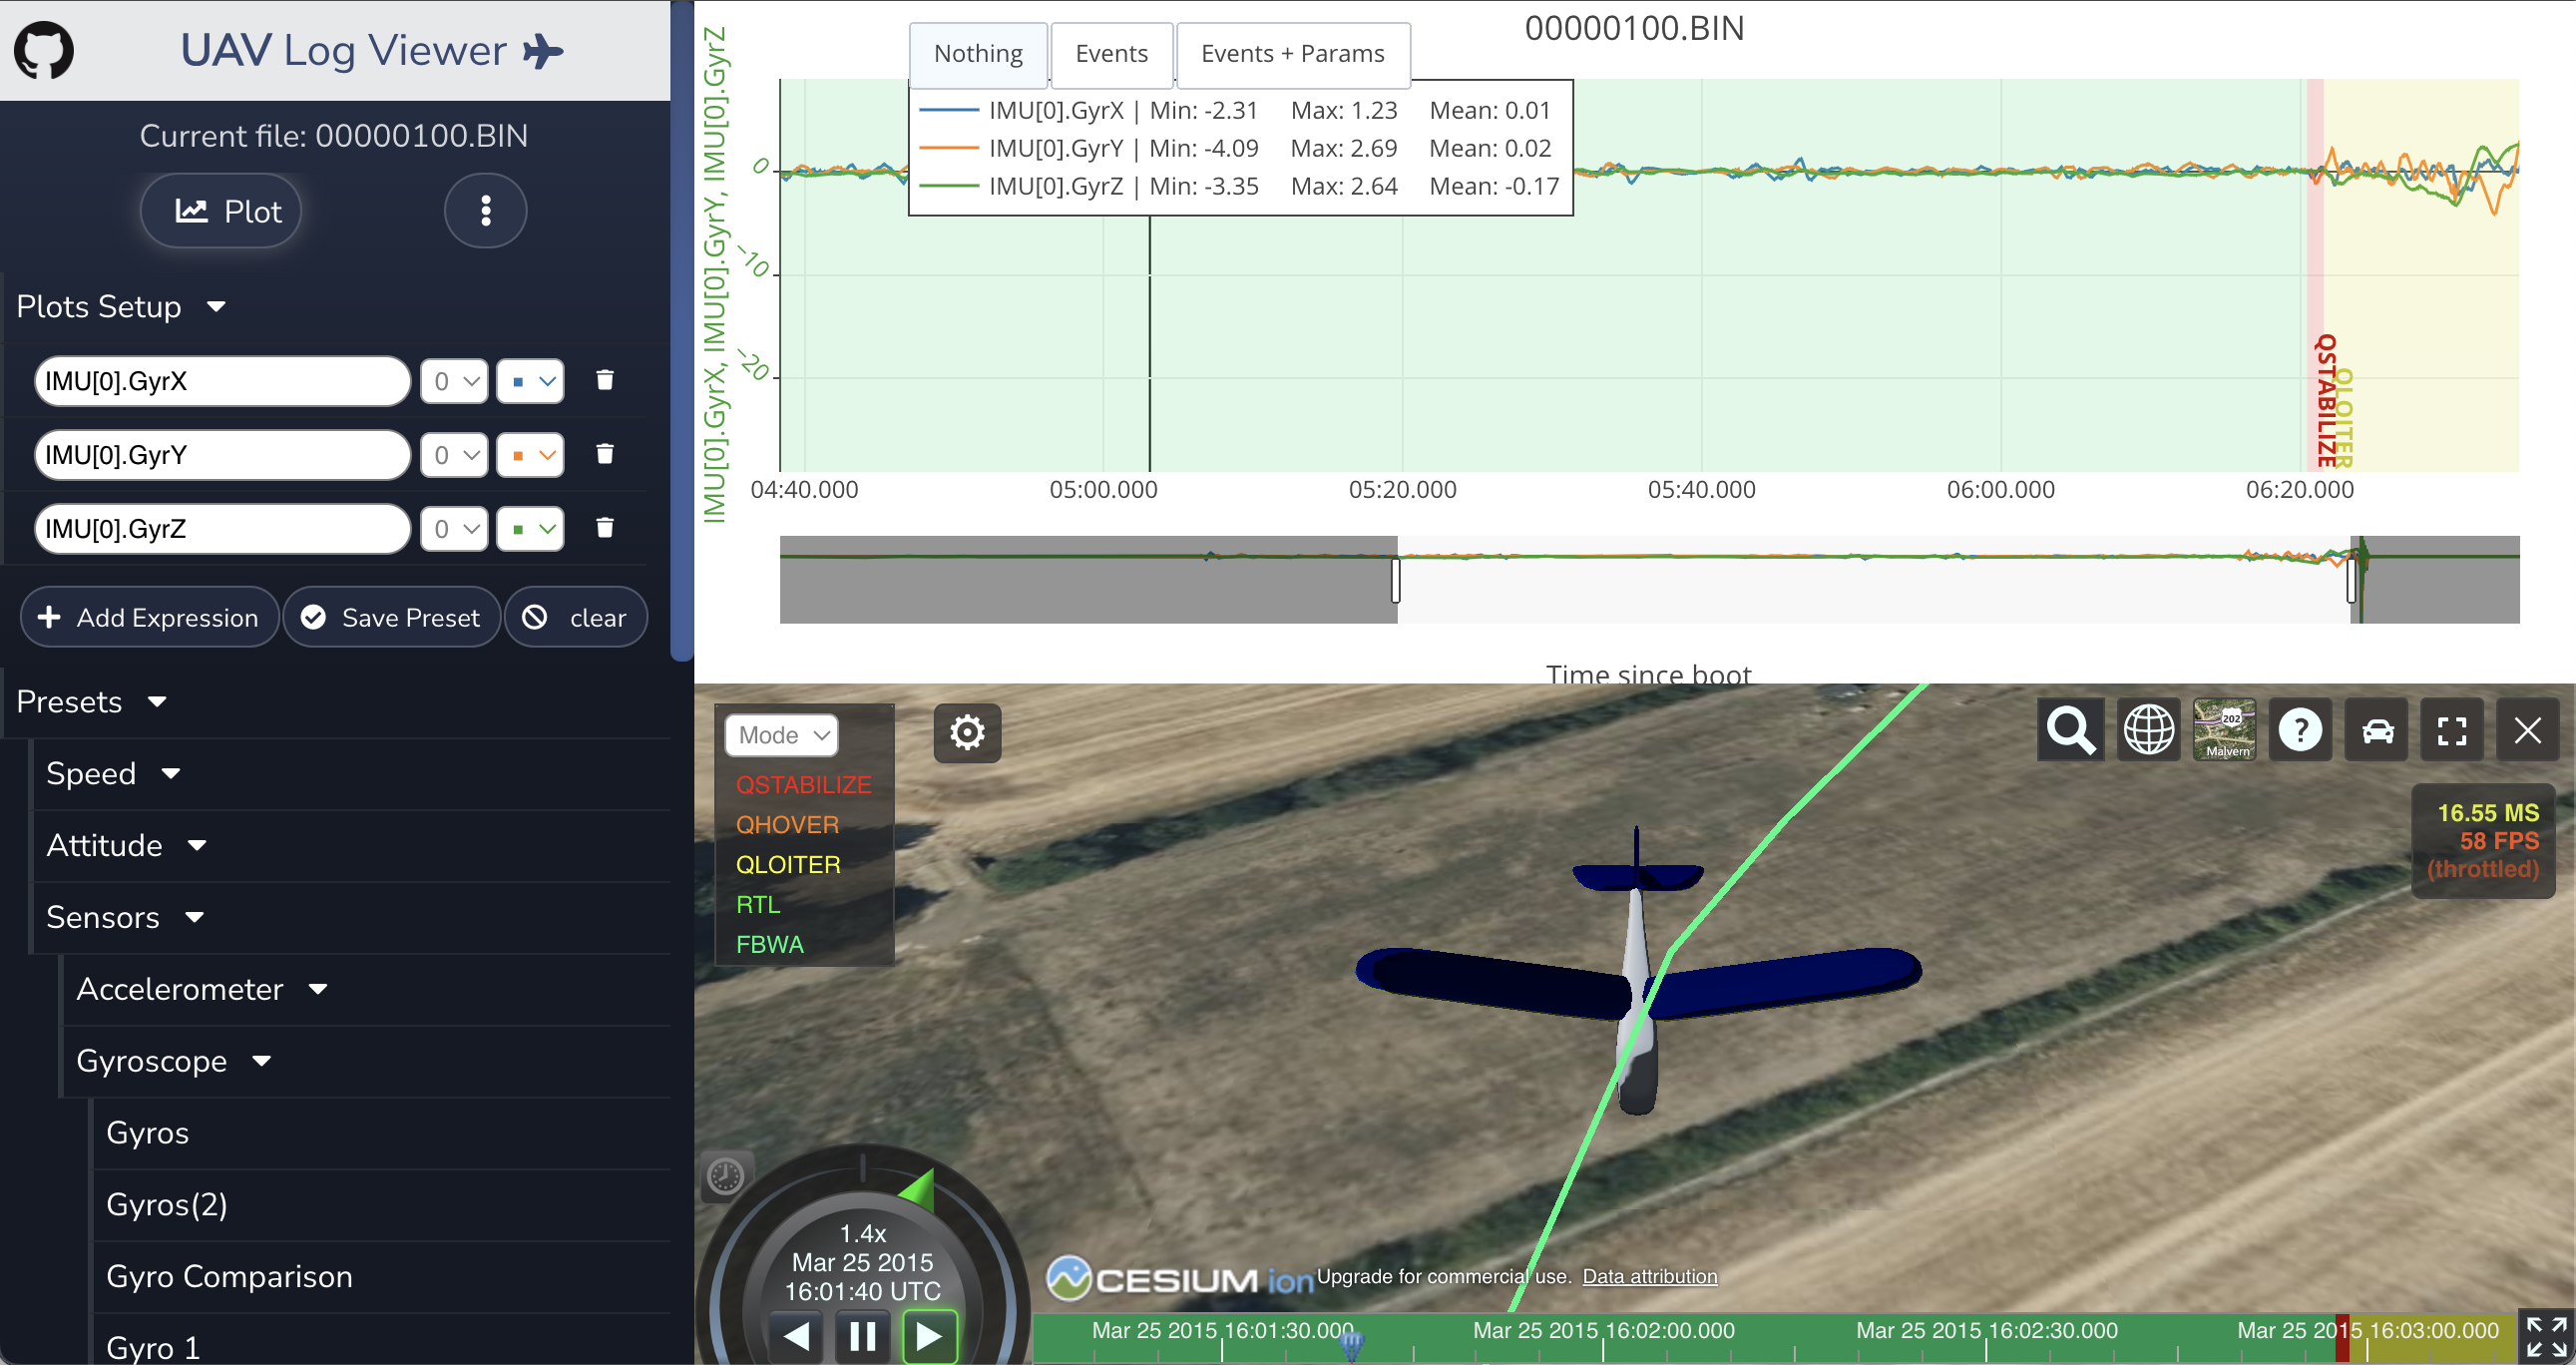

CSV data for this project demo was obtained via use of [**Ardupilot**](https://ardupilot.org/) open source autopilot system

#Isolation Forest Method for Anomaly Detection
##Dataset Contributing to a High Dimensional Space
Detecting anomalies or unusual patterns in UAV aircraft GPS speed and airspeed data could be important for identifying unexpected flight behavior. While GPS speed and airspeed may seem like simple metrics, when they are part of a larger dataset that includes various other features (like altitude, acceleration, and environmental conditions), they contribute to a high-dimensional space.
##Use of a Decision Tree Algorithm
The Isolation Forest is a tree-based method (using decision trees for random partitioning of the data and isolating anomalies) for detecting anomalies in high-dimensional datasets.


# Understanding the GPS Speed-Airspeed Data Set in Context
Understanding both GPS speed and airspeed is crucial for UAV operations. GPS speed is useful for navigation, ensuring that the UAV follows the desired flight path and reaches waypoints. Airspeed is essential for maintaining the UAV’s aerodynamic stability and ensuring it doesn’t stall, especially during critical flight phases like takeoff, landing, and during strong wind conditions.

***Tailwind Scenario (wind blowing in the same direction as the UAV)***

GPS speed: High (because the UAV is moving faster relative to the ground).

Airspeed: Lower (because the UAV is moving with the wind, so it needs less speed to maintain the same ground speed).

***Headwind Scenario (wind blowing against the UAV)***

GPS speed: Lower (because the UAV is fighting the wind and covering less ground).

Airspeed: High (because the UAV needs to work harder to move through the air against the wind).



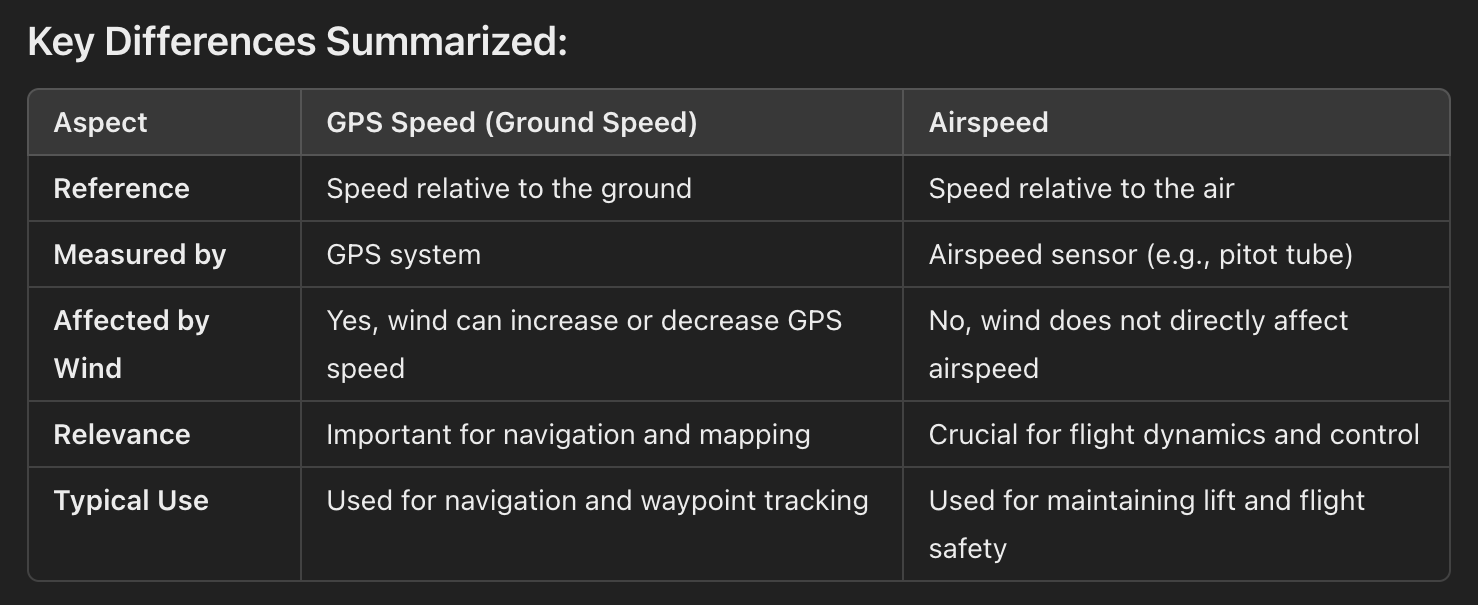

#Step 1 Data Preparation:
The GPS speed and airspeed data are combined into a 2D array (data) for feeding into the Isolation Forest model.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Sample data: GPS speed and airspeed
all_data = pd.read_csv('flightdata.csv')
print(all_data.columns)
gps_spd_data = all_data[['GPS_Spd']]
airspeed_data = all_data[['ARSP_Airspeed']]

Index(['timestamp_ms', 'GPS_Spd', 'ARSP_Airspeed'], dtype='object')


In [2]:
gps_spd_data.head()

,GPS_Spd
0,0.165
1,0.018
2,0.018
3,0.040
4,0.040


In [6]:
airspeed_data.head()

,ARSP_Airspeed
0,0.858818
1,1.771253
2,3.289540
3,2.375963
4,1.131173


In [7]:
# Combine the data into a 2D array for isolation forest
data = np.column_stack((gps_spd_data, airspeed_data))

#Step 2 Isolation Forest:
The model is trained using the contamination parameter, which controls the percentage of points classified as anomalies (in this case, 10%).



In [8]:
# Fit Isolation Forest model
clf = IsolationForest(contamination=0.1)  # Detect 10% as outliers # or adjust contamination rate to detect more/fewer anomalies
clf.fit(data)

IsolationForest(contamination=0.1)

#Step 3 Predictions:
The predictions from the Isolation Forest (1 for normal points, -1 for anomalies) are used to separate the data into two groups for visualization.


In [9]:
# Predict anomalies (-1 for anomalies, 1 for normal points)
predictions = clf.predict(data)

#Step 4 Plotting:
Two scatter plots are created and overlayed, one for normal points (blue) and one for anomalies (orange).


# Visualising the Points in a Scatter Plot

By examining the plotted normal points and anomalies, you gain insights into the UAV's operational characteristics and behaviors. Normal points provide a baseline for expected flight performance, while anomalies highlight potential problems or unusual behaviors that may require further investigation. This analysis is critical for enhancing flight safety, optimizing performance, and improving future UAV operations.

***Normal Points:*** Clusters of blue dots densely populated in certain areas, reflecting typical airspeed and GPS speed relationships during normal flight operations.

***Anomalies:*** Scattered red dots far from the main clusters of normal points, indicating deviations from expected behavior.






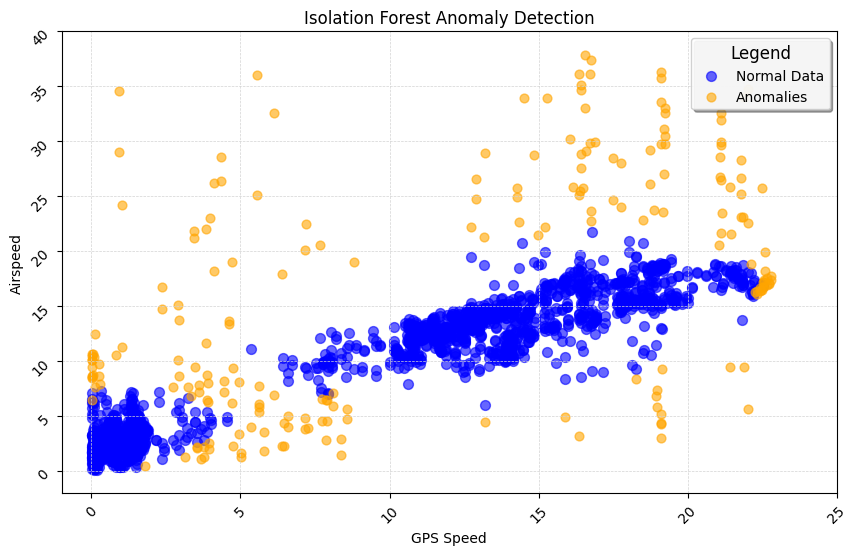

In [10]:
# Plotting the results

# Create plot area with grid
plt.figure(figsize=(10, 6))
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Plot normal points (labeled as 1) as blue scatter plot
normal = data[predictions == 1]
plt.scatter(normal[:, 0], normal[:, 1], color='blue', label='Normal Data', alpha=0.6, s=50)

# Plot anomaly points (labeled as -1) as orange scatter plot
anomalies = data[predictions == -1]
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='orange', label='Anomalies', alpha=0.6, s=40)

# Add labels and title
plt.xlabel('GPS Speed')
plt.ylabel('Airspeed')
plt.title('Isolation Forest Anomaly Detection')
plt.legend(loc='upper right', frameon=True, shadow=True, fontsize='medium', title='Legend', title_fontsize='large', framealpha=0.9)

# Plotting chart limits
plt.xlim(-1, 25)
plt.ylim(-2, 40)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()